# Schrodinger 1D


In [103]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [104]:
L = (0.5 + 5063/10000)  #Angstrom
L = L * 1e-10 # Convert to metre

In [105]:
dx = 1e-13
steps = np.arange(0, L, dx)

In [3]:
n = 1
m_e = 9.11e-31
h = 6.63e-34
h_bar = h / (2 * math.pi)

E_exact = []
for n in range(1, 4):
    E_exact.append((n**2)*(h**2)/(8 * m_e * (L)**2))

V = 0

5.956124229767617e-18
low


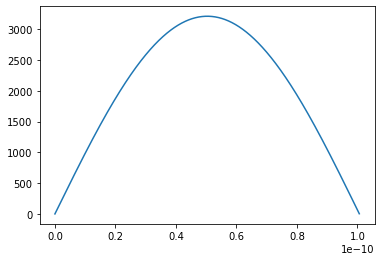

2.3824496919070468e-17
high


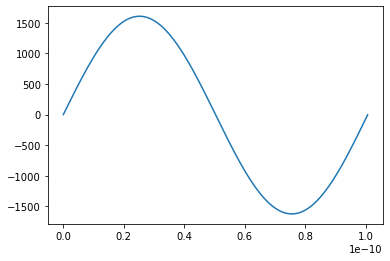

5.3605118067908554e-17
high


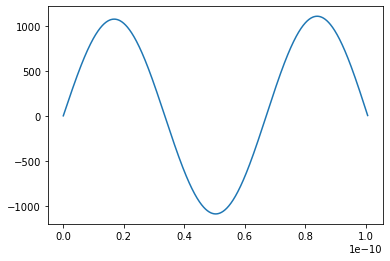

In [5]:
V = 0
for E in E_exact:
    w_euler = np.zeros(len(steps))
    psi_euler = np.zeros(len(steps))

    w_euler[0] = 1e14
    psi_euler[0] = 0

    ## Euler
    for i, step in enumerate(steps):
        try:
            psi_euler[i + 1] = psi_euler[i] + w_euler[i]*dx
            w_euler[i + 1] = w_euler[i] - (2*(m_e)*dx/h_bar**2)*(E - V)*psi_euler[i]
        except IndexError:
            pass
    print(E)
    count = 0

    for i, _psi in enumerate(psi_euler):
        try:
            if psi_euler[i + 1] * psi_euler[i] < 0:
                count += 1
        except:
            pass
    if count > 0:
        print("high")
    else:
        print("low")

    plt.plot(steps, psi_euler)
    plt.show()
#plt.plot(steps, psi_exact)

8.740109140258228e-18


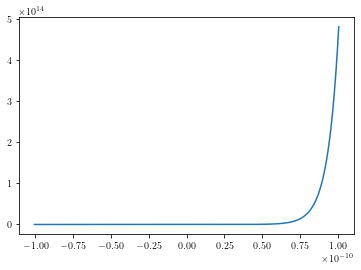

In [44]:
for E in E_exact:
    w_ec = np.zeros(len(steps))
    psi_ec = np.zeros(len(steps))

    w_ec[0] =  1e14
    psi_ec[0] = 0

    ## Euler-Cromer
    for i, step in enumerate(steps):
        try:
            psi_ec[i + 1] = psi_ec[i] + w_ec[i]*dx
            w_ec[i + 1] = w_ec[i] - (2*(m_e)/h_bar**2)*dx*(E - V)*psi_ec[i + 1]

        except IndexError:
            pass

    print(E)

    plt.plot(steps, psi_ec)
    plt.show()
#plt.plot(steps, psi_exact)

5.956124229767617e-18


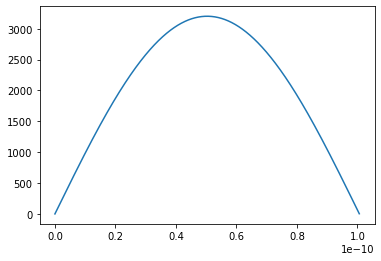

2.3824496919070468e-17


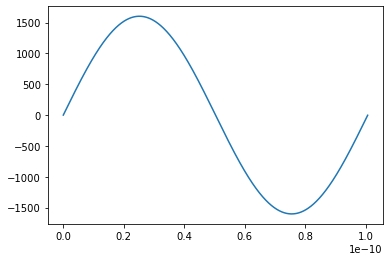

5.3605118067908554e-17


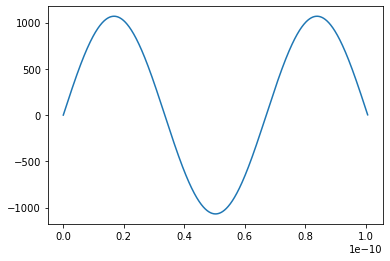

In [7]:
V = 0

for E in E_exact:
    w_ec = np.zeros(len(steps))
    psi_ec = np.zeros(len(steps))

    w_ec[0] =  1e14
    psi_ec[0] = 0

    ## Euler-Cromer
    for i, step in enumerate(steps):
        try:
            psi_ec[i + 1] = psi_ec[i] + w_ec[i]*dx
            w_ec[i + 1] = w_ec[i] - (2*(m_e)/h_bar**2)*dx*(E - V)*psi_ec[i + 1]

        except IndexError:
            pass

    print(E)
    plt.plot(steps, psi_ec)
    plt.show()

In [117]:
from scipy.integrate import trapz

high


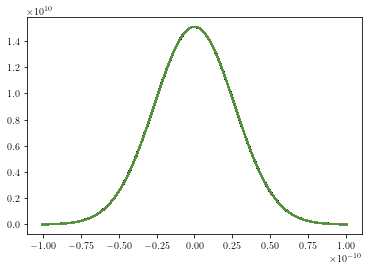

In [21]:
# Runge-Kutta
steps = np.arange(-L, L, dx)

E_exact = [8.740109140258228e-18] # [2.6222263007666373e-17] # square n = 2, [4.027321940256881e-17] 

for n, E in enumerate(E_exact):
    
    w_rk = np.zeros(len(steps))
    psi_rk = np.zeros(len(steps))

    w_rk[0] = 1
    psi_rk[0] = 0

    for i, step in enumerate(steps):        

        try:    
            V =  ipw() #harmonic(k = 2.5e4, x = step) #square(bound_1 = -0.25e-10, Vb1 = 0, bound_2 = 0.25e-10, Vb2 = 0, x = step, Vs = 10e-17) #harmonic(k = 2.5e4, x = step) morse(x = step, D_e = 4.67*(1.6e-19), a = 1.85e-10, r_e = 1.2e-10)
            
            apsi = w_rk[i]
            aw = ((-2 * m_e)/(h_bar**2))*(E - V)*psi_rk[i]

            bpsi = w_rk[i] + (dx/2)*aw        
            bw = ((-2 * m_e)/(h_bar**2))*(E - V)*(psi_rk[i] + (dx/2)*apsi)


            cpsi = w_rk[i] + (dx/2)*bw
            cw = ((-2 * m_e)/(h_bar**2))*(E - V)*(psi_rk[i] + (dx/2)*bpsi)

            dpsi = w_rk[i] + dx*cw
            dw = ((-2 * m_e)/(h_bar**2))*(E - V)*(psi_rk[i] + dx*cpsi)

            w_rk[i + 1] = w_rk[i] + (1/6)*(aw + 2*bw + 2*cw + dw)*dx
            psi_rk[i + 1] = psi_rk[i] + (1/6)*(apsi + 2*bpsi + 2*cpsi + dpsi)*dx

        except IndexError:
            pass

    count = 0
    for i, _psi in enumerate(psi_rk):
        try:
            if psi_rk[i + 1] * psi_rk[i] < 0:
                count += 1
        except:
            pass

    if count > 0:
        print("high")
    else:
        print("low")
    
    psi_exact = np.zeros(len(steps))
    
    for i, step in enumerate(steps):
        #psi_exact[i] = wavefunction(step, n + 1)
        plt.plot(steps, (psi_rk/trapz(psi_rk, steps)))
        #plt.xlim(0, 5e-10)
        
    plt.show()

In [8]:
delta = 1

e_max = 1e-16
e_min = 1e-25

n = 1

#steps = np.arange(0, L, dx)
steps = np.arange(-L, L, dx)

found = False

while not found:
    E = (e_max + e_min) * 0.5
    
    w_rk = np.zeros(len(steps))
    psi_rk = np.zeros(len(steps))

    w_rk[0] = 1
    psi_rk[0] = 0

    for i, step in enumerate(steps):
        try:           
            #V = morse(x = step, D_e = 4.67*(1.6e-19), a = 1.85e-10, r_e = 1.2e-10) #0 #square(bound_1 = -0.25e-10, Vb1 = 0, bound_2 = 0.25e-10, Vb2 = 0, x = step, Vs = 10e-18) # harmonic(k = 2.5e4, x = step)
            
            V = harmonic(k = 2.5e4, x = step) 
            
            apsi = w_rk[i]
            aw = ((-2 * m_e)/(h_bar**2))*(E - V)*psi_rk[i]

            bpsi = w_rk[i] + (dx/2)*aw        
            bw = ((-2 * m_e)/(h_bar**2))*(E - V)*(psi_rk[i] + (dx/2)*apsi)


            cpsi = w_rk[i] + (dx/2)*bw
            cw = ((-2 * m_e)/(h_bar**2))*(E - V)*(psi_rk[i] + (dx/2)*bpsi)

            dpsi = w_rk[i] + dx*cw
            dw = ((-2 * m_e)/(h_bar**2))*(E - V)*(psi_rk[i] + dx*cpsi)

            w_rk[i + 1] = w_rk[i] + (1/6)*(aw + 2*bw + 2*cw + dw)*dx
            psi_rk[i + 1] = psi_rk[i] + (1/6)*(apsi + 2*bpsi + 2*cpsi + dpsi)*dx

        except IndexError:
            pass

    count = 0

    for i, _psi in enumerate(psi_rk):
        try:
            if psi_rk[i + 1] * psi_rk[i] < 0: # number of crosses of x axis
                count += 1
        except:
            pass

    if count >= n: # too high
        # lower E
        e_max = E
    else: # too low
        # increase minimum to E
        e_min = E
    delta = e_max - e_min
    
    if delta < 1e-30:
        found = True
        
        print(e_max, e_min)
#print(E_exact)

8.740109140258228e-18 8.740109140257517e-18


In [244]:
delta = 1

e_max = 1e-16
e_min = 1e-25

n = 1

found = False
steps = np.arange(0, L, dx)

while not found:
    E = (e_max + e_min) * 0.5

    w_rk = np.zeros(len(steps))
    psi_rk = np.zeros(len(steps))

    w_rk[0] = 1
    psi_rk[0] = 0

    steps = np.arange(0, L, dx)
    for i, step in enumerate(steps):
        try:    
            V = harmonic(k = 2.5e4, x = step)
            
            apsi = w_rk[i]
            aw = ((-2 * m_e)/(h_bar**2))*(E - V)*psi_rk[i]

            bpsi = w_rk[i] + (dx/2)*aw        
            bw = ((-2 * m_e)/(h_bar**2))*(E - V)*(psi_rk[i] + (dx/2)*apsi)


            cpsi = w_rk[i] + (dx/2)*bw
            cw = ((-2 * m_e)/(h_bar**2))*(E - V)*(psi_rk[i] + (dx/2)*bpsi)

            dpsi = w_rk[i] + dx*cw
            dw = ((-2 * m_e)/(h_bar**2))*(E - V)*(psi_rk[i] + dx*cpsi)

            w_rk[i + 1] = w_rk[i] + (1/6)*(aw + 2*bw + 2*cw + dw)*dx
            psi_rk[i + 1] = psi_rk[i] + (1/6)*(apsi + 2*bpsi + 2*cpsi + dpsi)*dx

        except IndexError:
            pass

    count = 0

    for i, _psi in enumerate(psi_rk):
        try:
            if psi_rk[i + 1] * psi_rk[i] < 0: # number of crosses of x axis
                count += 1
        except:
            pass

    if count >= n: # too high
        # lower E
        e_max = E
    else: # too low
        # increase minimum to E
        e_min = E
    delta = e_max - e_min
    
    if delta < :
        found = True
        
print(e_max, e_min)
print(E_exact)

2.6217446897330435e-17 2.6217446897329723e-17
[2.2854993605330477e-17]


## Potentials

In [114]:
def ipw(x):
    return 0

def harmonic(k, x):
    return 0.5 * k * x**2

def square(bound_1, Vb1, bound_2, Vb2, x, Vs):
    if x <= bound_1:
        return Vb1
    
    elif x >= bound_2:
        return Vb2
    
    else:
        return Vs

def morse(x, r_e, a, D_e):
    '''
    Parameters
    ----------
    
    x: distance between particles
    r_e: equilibrium bond distance
    a: width of the well
    D_e: dissocaition energy / well depth
    
    Returns
    --------
    
    morse_potential: float
        morse potential at x given the parameters of the potential.
    
    '''
    return D_e * ( 1 - math.exp(-a * (x - r_e) * 1e20) )**2

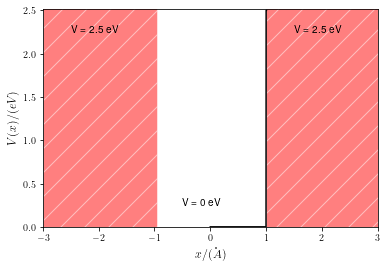

In [21]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.plot(steps/1e-10, [square(-1e-10, 4e-19, 1e-10, 4e-19, step, 0)/1.6e-19 for step in steps], c="black")
plt.xlabel("$x /  ( \AA )$", fontsize=12)
plt.ylabel("$V(x) /  ( eV )$", fontsize=12)
plt.xlim(-3,3)
plt.ylim(0, 2.51)
plt.axvspan(xmin=1, xmax=3, ymin=0, ymax=2, facecolor='red', alpha=0.5, hatch="/", edgecolor="white") # step up color
plt.axvspan(xmin=-0.95, xmax=-3, ymin=0, ymax=2, facecolor='red', alpha=0.5, hatch="/", edgecolor="white") # step up color

plt.text(-2.5,2.25,"V = 2.5 eV")
plt.text(1.5,2.25,"V = 2.5 eV")
plt.text(-.5,0.25,"V = 0 eV")
plt.savefig("square_potential")

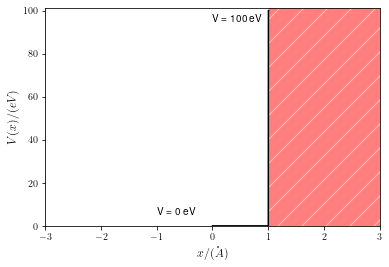

In [23]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.plot(steps/1e-10, [square(x = step, bound_1 = 1e-10, Vb1 = 0, bound_2 = 0.5e-10, Vb2 = 100*(1.6e-19), Vs = 100*(1.6e-19))/1.6e-19 for step in steps], c="black")
plt.xlabel("$x /  ( \AA )$", fontsize=12)
plt.ylabel("$V(x) /  ( eV )$", fontsize=12)
plt.xlim(-3,3)
plt.ylim(0,101)

plt.axvspan(xmin=1, xmax=3, ymin=0, ymax=99, facecolor='red', alpha=0.5, hatch="/", edgecolor="white") # step up color
plt.text(0,95,"V = 100 eV")
plt.text(-1, 5,"V = 0 eV")

plt.savefig("step_potential")

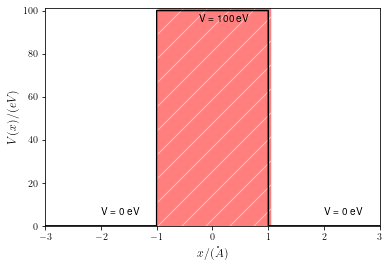

In [24]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
steps = np.arange(-3*L, 3*L, dx)


plt.plot(steps/1e-10, [square(x = step, bound_1 = -1e-10, Vb1 = 0, bound_2 = 1e-10, Vb2 = 0, Vs = 100*(1.6e-19))/1.6e-19 for step in steps], c="black")
plt.xlabel("$x /  ( \AA )$", fontsize=12)
plt.ylabel("$V(x) /  ( eV )$", fontsize=12)

plt.xlim(-3, 3)
plt.ylim(0, 101)
plt.axvspan(xmin=-1, xmax=1.05, ymin=0, ymax=101, facecolor='red', alpha=0.5, hatch="/", edgecolor="white") # step up color

plt.text(-0.25, 95,"V = 100 eV")
plt.text(-2, 5,"V = 0 eV")
plt.text(2, 5,"V = 0 eV")


plt.savefig("barrier_potential")

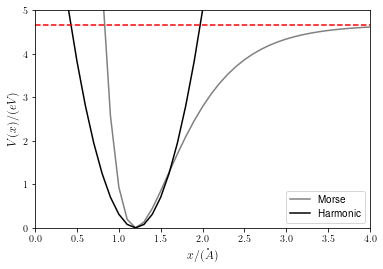

<Figure size 432x288 with 0 Axes>

In [104]:
'''
plt.plot(steps, [harmonic(1e11, step) for step in steps])
plt.plot(steps, [triangular(1, step) for step in steps])
plt.plot(steps, [square(0, 4e-10, 1e-10, 4e-10, step, 0) for step in steps])
'''
dx = 1e-11
steps = np.arange(0, 5e-10, dx)
plt.plot(steps/1e-10, [morse(x = step, D_e = 4.67*(1.6e-19), a = 1.85e-10, r_e = 1.2e-10)/1.6e-19 for step in steps], label="Morse", c="grey")
plt.plot([(-step + 1.2e-10)/1e-10 for step in steps], [harmonic(x = step, k = 2.5e2)/1.6e-19 for step in steps], c='black')
plt.plot([(step + 1.2e-10)/1e-10 for step in steps], [harmonic(x = step, k = 2.5e2)/1.6e-19 for step in steps], c='black', label="Harmonic")

plt.ylim(0, 5)
plt.xlim(0, 4)
plt.xlabel("$x /  ( \AA )$", fontsize=12)
plt.ylabel("$V(x) /  ( eV )$", fontsize=12)

plt.axhline(y = 4.67, color = 'r', linestyle = 'dashed')
plt.legend()
plt.show()
plt.savefig("morse_harmonic.png")

In [10]:
# potential functions
def ipw(x):
    return 0

def harmonic(k, x):
    return 0.5 * k * x**2

def triangular(m, x):
    # region based as well, need to get formula
    return m * x

def square(bound_1, Vb1, bound_2, Vb2, x, Vs):
    if x <= bound_1:
        return Vb1

    elif x >= bound_2:
        return Vb2

    else:
        return Vs

def morse(x, r_e, a, D_e):
    '''
    Parameters
    ----------

    x: distance between particles
    r_e: equilibrium bond distance
    a: width of the well
    D_e: dissocaition energy / well depth

    Returns
    --------

    morse_potential: float
        morse potential at x given the parameters of the potential.

    '''
    return D_e * ( 1 - math.exp(-a * (x - r_e) * 1e20) )**2

## Wavefunction class

In [107]:
import numpy as np
from functools import partial

class Wavefunction():
    def __init__(self):
        self.l = (0.5 + 5063/10000) * 1e-10
        self.C = (-2 * m_e)/(h_bar**2)
    
    def euler(self, w, psi, E, V, dx):
        psi_e = psi + w*dx
        w_e = w + self.C*dx*(E - V)*psi

        return w_e, psi_e
    
    def euler_cromer(self, w, psi, E, V, dx):
        psi_ec = psi + w*dx
        w_ec = w + self.C*dx*(E - V)*psi
        return w_ec, psi_ec
    
    def runge_kutta(self, w, psi, E, V, dx):
        L = E - V # L is lagrangian
        
        apsi = w
        aw = self.C * L * psi 

        bpsi = w + (dx/2)*aw        
        bw = self.C* L *(psi + (dx/2)*apsi)

        cpsi = w + (dx/2)*bw
        cw = self.C* L *(psi + (dx/2)*bpsi)

        dpsi = w + dx*cw
        dw = self.C * L * (psi + dx*cpsi)

        w_rk = w + (1/6)*(aw + 2*bw + 2*cw + dw)*dx
        psi_rk = psi + (1/6)*(apsi + 2*bpsi + 2*cpsi + dpsi)*dx
                
        return w_rk, psi_rk
    
    def ipw_wavefunction(self, x, n):
        return math.sqrt(2/(self.l))*math.sin(n * math.pi * x/(self.l))
    
    def exact_eigen_energy(self, n, V):
        if V == ipw:
            return (n**2)*(h**2)/(8 * m_e * (self.l)**2)
    
    def eigen_energy_solver(self, n, V, x_min, x_max, dx, method = "rk4"):
        # code should read like psedocode
        if method not in ["rk4", "eu", "euc"]:
            raise Exception("Not valid method")
            
        steps = np.arange(x_min, x_max, dx)
                    
        delta = 1
        
        e_max = 1e-16
        e_min = 1e-25
        
        converged = False
        counter = 0
        
        while not converged:
            E = (e_max + e_min) * 0.5

            w = np.zeros(len(steps))
            psi = np.zeros(len(steps))
                        
            w[0] = 1 # are these true for all potentials
            psi[0] = 0
    
            for i, step in enumerate(steps[:-1]):
                if method == "rk4":
                    w[i + 1] , psi[i + 1] =  self.runge_kutta(w[i], psi[i], E, V(x = step), dx)
                elif method == "eu":
                    w[i + 1] , psi[i + 1] =  self.euler(w[i], psi[i], E, V(x = step), dx)
                else:
                    w[i + 1] , psi[i + 1] =  self.euler_cromer(w[i], psi[i], E, V(x = step), dx)
            roots = 0

            for i, _ in enumerate(psi[:-1]):
                if psi[i + 1] * psi[i] < 0: # number of crosses of x axis
                    roots += 1
                
                if roots >= n:
                    e_max = E
                    break
                    
            if roots < n: # too low
                e_min = E

            delta = e_max - e_min
            avg = (e_max + e_min)/2
            
            #print(f"Emax = {e_max}, Emin = {e_min} , avg / delta = {delta/avg}")
            
            counter += 1
            if (delta / avg) < 1e-12: # add proper condition.
                converged = True

            #print(e_max, e_min)
        
        return e_max
    
    def plot_wavefunction(self, n, V, x_min, x_max, dx, method = "rk4"):
        
        
        steps = np.arange(x_min, x_max, dx)
            
        w = np.zeros(len(steps))
        psi = np.zeros(len(steps))
        
        if V == morse:
            E = self.eigen_energy_solver(n, isw, x_min, x_max, dx)
        E = self.eigen_energy_solver(n, V, x_min, x_max, dx)
                
        w[0] = 1 
        psi[0] = 0
        
        # nice to add potential to this plot
        for i, step in enumerate(steps[:-1]):
                if method == "rk4":
                    w[i + 1] , psi[i + 1] =  self.runge_kutta(w[i], psi[i], E, V(x = step), dx)
                elif method == "eu":
                    w[i + 1] , psi[i + 1] =  self.euler(w[i], psi[i], E, V(x = step), dx)
                else:
                    w[i + 1] , psi[i + 1] =  self.euler_cromer(w[i], psi[i], E, V(x = step), dx)
        #plt.plot(steps/1e-10, psi/1e-13)
        return steps, psi, E
    

In [108]:
wf = Wavefunction()

### Infinite Square well

In [217]:
exact = wf.exact_eigen_energy(n = 1, V = ipw)

'''EULER = 5.9562426121166974e-18
EULER_CROMER = 5.9562426121166974e-18
RUNGE_KUTTA = 5.956242608245661e-18'''

#print(f"Euler accuracy : {abs(exact - EULER)/exact}")
#f"Euler-Cromer : {}")
eu_acc = abs(exact - EULER)
euc_acc = abs(exact - EULER_CROMER)
rk4_acc = abs(exact - RUNGE_KUTTA)
#f"RK4 accuracy : {}")


In [221]:
RUNGE_KUTTA/1.6e-19
exact/1.6e-19

37.22577643604761

In [224]:
#print(eu_acc, rk4_acc)
print((EULER - exact)/1.6e-19)
print((EULER_CROMER - exact)/1.6e-19)
print((RUNGE_KUTTA - exact)/1.6e-19)

2.5276867555110276e-10
2.5276867555110276e-10
4.078156657239972e-12


In [212]:
import time

start = time.time()

EULER = wf.eigen_energy_solver(n = 1, V =  ipw, x_min = 0, x_max = L, dx = 1e-16, method = "eu")

print(time.time() - start)

eu
70.40785193443298


In [213]:
start = time.time()

EULER_CROMER = wf.eigen_energy_solver(n = 1, V =  ipw, x_min = 0, x_max = L, dx = 1e-16, method = "euc")

print(time.time() - start)

euc
69.08177423477173


In [214]:
start = time.time()

RUNGE_KUTTA = wf.eigen_energy_solver(n = 1, V =  ipw, x_min = 0, x_max = L, dx = 1e-16, method = "rk4")

print(time.time() - start)

rk4
202.46119689941406


In [226]:
#Euler Analysis
import pandas as pd
pd.set_option("display.precision", 14)

import time

levels = [n for n in range(1,5)]
numerical = []
exact = []
delta = []
times = []

for n in levels:
    st = time.time()
    
    e = wf.eigen_energy_solver(n = n, V = ipw, x_min = 0, x_max = L, dx = 1e-16, method="eu")/1.6e-19
    numerical.append(e)
    e_exact = wf.exact_eigen_energy(n = n, V = ipw)/1.6e-19
    exact.append(e_exact)
    delta.append(abs(e - e_exact))
    
    times.append(time.time() - st)
df = pd.DataFrame({'n' : levels, 'E_num': numerical, 'E_exact': exact, 'error' : delta, 'times':times})
print(df)

eu
eu
eu
eu
   n       E_num     E_exact         error      times
0  1   37.225776   37.225776  2.527685e-10  64.469434
1  2  148.903106  148.903106  3.975515e-09  60.307418
2  3  335.031988  335.031988  1.984347e-08  58.753396
3  4  595.612423  595.612423  6.220966e-08  57.505944


In [237]:
levels = [n for n in range(1,5)]
numerical = []
exact = []
delta = []
times = []

for n in levels:
    st = time.time()
    
    e = wf.eigen_energy_solver(n = n, V = ipw, x_min = 0, x_max = L, dx = 1e-16, method="rk4")/1.6e-19
    numerical.append(e)
    e_exact = wf.exact_eigen_energy(n = n, V = ipw)/1.6e-19
    exact.append(e_exact)
    delta.append(abs(e - e_exact))
    
    times.append(time.time() - st)
df_rk4 = pd.DataFrame({'n' : levels, 'E_num': numerical, 'E_exact': exact, 'error' : delta, 'times':times})
print(df_rk4)

rk4
rk4
rk4
rk4
   n               E_num             E_exact             error  \
0  1   37.22577643605169   37.22577643604761  0.00000000000408   
1  2  148.90310574432900  148.90310574419044  0.00000000013856   
2  3  335.03198792466100  335.03198792442851  0.00000000023249   
3  4  595.61242297701199  595.61242297676176  0.00000000025022   

                times  
0  154.56767678260803  
1  149.99870204925537  
2  141.06683707237244  
3  138.41810703277588  


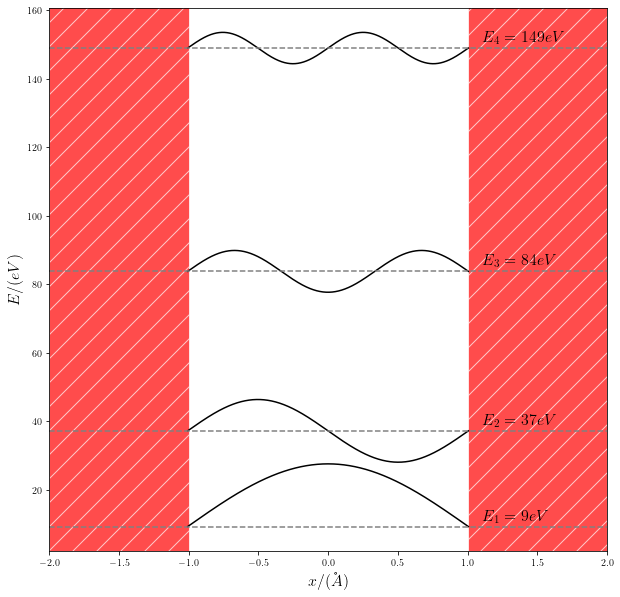

In [18]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
plt.figure(figsize=(10, 10))

steps, psi, E = wf.plot_wavefunction(n = 1, V = ipw, x_min = -L, x_max = L, dx = 1e-13)

plt.plot(steps/1e-10, (psi/3.5e-12) + E/1.6e-19, c="black")
plt.axhline(E/1.6e-19, linestyle="--", c="gray")
plt.text(1.1,(E/1.6e-19) + 2 ,f"$E_{1} = {str(round(E/1.6e-19))} eV$", fontsize=16)


steps, psi, E = wf.plot_wavefunction(n = 2, V = ipw, x_min = -L, x_max = L, dx = 1e-13)

plt.plot(steps/1e-10, (psi/3.5e-12) + E/1.6e-19, c="black")
plt.axhline(E/1.6e-19, linestyle="--", c="gray")
plt.text(1.1,(E/1.6e-19) + 2 ,f"$E_{2} = {str(round(E/1.6e-19))} eV$", fontsize=16)

steps, psi, E = wf.plot_wavefunction(n = 3, V = ipw, x_min = -L, x_max = L, dx = 1e-13)

plt.plot(steps/1e-10, (psi/3.5e-12) + E/1.6e-19, c="black")
plt.axhline(E/1.6e-19, linestyle="--", c="gray")
plt.text(1.1,(E/1.6e-19) + 2 ,f"$E_{3} = {str(round(E/1.6e-19))} eV$", fontsize=16)

steps, psi, E = wf.plot_wavefunction(n = 4, V = ipw, x_min = -L, x_max = L, dx = 1e-13)
plt.plot(steps/1e-10, (psi/3.5e-12) + E/1.6e-19 , c="black")
plt.axhline(E/1.6e-19, linestyle="--", c="gray")
plt.text(1.1,(E/1.6e-19) + 2 ,f"$E_{4} = {str(round(E/1.6e-19))} eV$", fontsize=16)

plt.xlabel("$x /  ( \AA )$", fontsize=16)
plt.ylabel("$E /  ( eV )$", fontsize=16)
plt.xlim(-2,2)
plt.axvspan(xmin=1, xmax=2, ymin=0, ymax=2, facecolor='red', alpha=0.7, hatch="/", edgecolor="white") # step up color
plt.axvspan(xmin=-1, xmax=-2, ymin=0, ymax=2, facecolor='red', alpha=0.7, hatch="/", edgecolor="white") # step up color


plt.savefig("ipw")

rk4
rk4
rk4
rk4


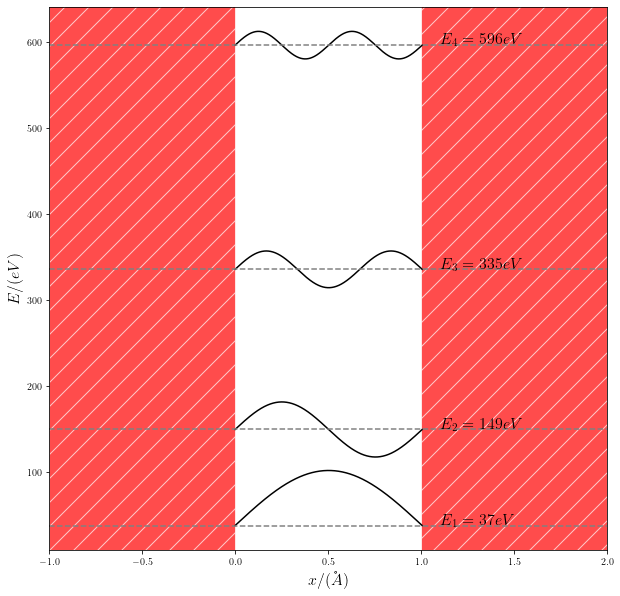

In [249]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
plt.figure(figsize=(10, 10))

steps, psi, E = wf.plot_wavefunction(n = 1, V = ipw, x_min = 0, x_max = L, dx = 1e-13)

plt.plot(steps/1e-10, (psi/5e-13) + E/1.6e-19, c="black")
plt.axhline(E/1.6e-19, linestyle="--", c="gray")
plt.text(1.1,(E/1.6e-19) + 2 ,f"$E_{1} = {str(round(E/1.6e-19))} eV$", fontsize=16)


steps, psi, E = wf.plot_wavefunction(n = 2, V = ipw, x_min = 0, x_max = L, dx = 1e-13)

plt.plot(steps/1e-10, (psi/5e-13) + E/1.6e-19, c="black")
plt.axhline(E/1.6e-19, linestyle="--", c="gray")
plt.text(1.1,(E/1.6e-19) + 2 ,f"$E_{2} = {str(round(E/1.6e-19))} eV$", fontsize=16)

steps, psi, E = wf.plot_wavefunction(n = 3, V = ipw, x_min = 0, x_max = L, dx = 1e-13)

plt.plot(steps/1e-10, (psi/5e-13) + E/1.6e-19, c="black")
plt.axhline(E/1.6e-19, linestyle="--", c="gray")
plt.text(1.1,(E/1.6e-19) + 2 ,f"$E_{3} = {str(round(E/1.6e-19))} eV$", fontsize=16)

steps, psi, E = wf.plot_wavefunction(n = 4, V = ipw, x_min = 0, x_max = L, dx = 1e-13)
plt.plot(steps/1e-10, (psi/5e-13) + E/1.6e-19 , c="black")
plt.axhline(E/1.6e-19, linestyle="--", c="gray")
plt.text(1.1,(E/1.6e-19) + 2 ,f"$E_{4} = {str(round(E/1.6e-19))} eV$", fontsize=16)

plt.xlabel("$x /  ( \AA )$", fontsize=16)
plt.ylabel("$E /  ( eV )$", fontsize=16)
plt.xlim(-1, 2)
plt.axvspan(xmin=1, xmax=2, ymin=0, ymax=2, facecolor='red', alpha=0.7, hatch="/", edgecolor="white") # step up color
plt.axvspan(xmin=0, xmax=-1, ymin=0, ymax=2, facecolor='red', alpha=0.7, hatch="/", edgecolor="white") # step up color

plt.savefig("ipw_0L_visual")

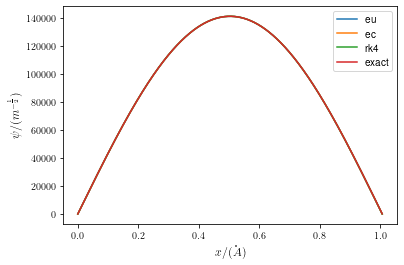

In [178]:
def plot_psi(n):
    for method in ["eu", "ec", "rk4"]:
        steps, psi, E = wf.plot_wavefunction(
            n = n,
            V = ipw,
            x_min = 0,
            x_max = L,
            dx = 1e-13,
            method=method
        )
        plt.plot(steps/1e-10, (psi)/math.sqrt(trapz(psi**2, steps)), label=method)
        
        psi_exact = np.zeros(len(steps))
        for i, step in enumerate(steps):
            psi_exact[i] = math.sqrt(2 / L)*math.sin((n * math.pi * step)/L)
            

    plt.plot(steps/1e-10, psi_exact/math.sqrt(trapz(psi_exact**2, steps)), label="exact")
    plt.xlabel("$x /  ( \AA )$", fontsize=12)
    plt.ylabel(r"$\psi /  ( m^{-\frac{1}{2}} )$", fontsize=12)
    plt.legend()

plot_psi(n = 1)
plt.savefig("ipw_n1_dt13")

In [196]:
import pandas as pd

levels = [n for n in range(1,5)]
numerical = []
exact = []
delta = []

for n in levels:
    e = wf.eigen_energy_solver(n = n, V = ipw, x_min = 0, x_max = L, dx = 1e-15, method="eu")/1.6e-19
    numerical.append(e)
    e_exact = wf.exact_eigen_energy(n = n, V = ipw)/1.6e-19
    exact.append(e_exact)
    delta.append(abs(e - e_exact))
df = pd.DataFrame({'n' : levels, 'E_num': numerical, 'E_exact': exact, 'error' : delta})
print(df)

eu
eu
eu
eu
   n       E_num     E_exact     error
0  1   37.226516   37.225776  0.000740
1  2  148.906066  148.903106  0.002960
2  3  335.038649  335.031988  0.006661
3  4  595.624267  595.612423  0.011844


### Harmonic

In [38]:
wf.eigen_energy_solver(n = 2, V =  partial(harmonic, k = 2.5e4), x_min = 0, x_max = L, dx = 1e-13 ) # partial(harmonic, k = 2.5e4) - called currying function
wf.plot_wavefunction(n = 2, V = partial(harmonic, k = 2.5e4), x_min = -L, x_max = L, dx = 1e-13)

(array([-1.0063e-10, -1.0053e-10, -1.0043e-10, ...,  1.0037e-10,
         1.0047e-10,  1.0057e-10]),
 array([ 0.00000000e+00,  1.00002737e-13,  2.00021870e-13, ...,
        -2.03935145e-13, -1.01959204e-13,  8.72678604e-20]),
 2.6221191274813153e-17)

In [99]:
def find_n_eigenenergies(n, V, x_min = 0, x_max = L, dx = 1e-15, method="rk4"):
    levels = [n for n in range(1, n + 1)]
    numerical = []

    for n in levels:
        e = wf.eigen_energy_solver(n = n, V = V, x_min = x_min, x_max = x_max, dx = dx, method=method)/1.6e-19
        numerical.append(e)       
        print(harmonic_energy_exact(n = n - 1, k = 1e4, m = 9.11e-31))
    df = pd.DataFrame({'n' : levels, 'E_num': numerical})
    return df

In [64]:
def find_n_eigenfunctions(n, V, x_min = 0, x_max = L, dx = 1e-15, method="rk4"):
    
    levels = [n for n in range(1, n + 1)]
    numerical = []

    
    for n in levels:
        steps, psi, E = wf.plot_wavefunction(n = n, V = V, x_min = x_min, x_max = x_max, dx = dx, method=method)
        numerical.append(psi)       
        
    #df = pd.DataFrame({'n' : levels, 'psi': numerical})
    
    return steps, numerical

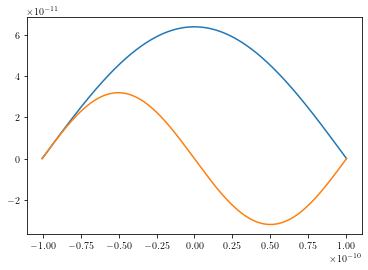

In [367]:
steps, psis = find_n_eigenfunctions(n = 2, V = ipw, x_min = -L, dx=1e-13)

In [100]:
find_n_eigenenergies(n = 3, V = partial(harmonic, k = 1e4), x_min = -L, dx=1e-16)

34.54812587289226
103.64437761867677
172.74062936446126


,n,E_num
0,1,34.57139404601106
1,2,104.01363068611369
2,3,175.29130589985357


rk4
rk4
104.01531871588129
rk4
175.30090078671998


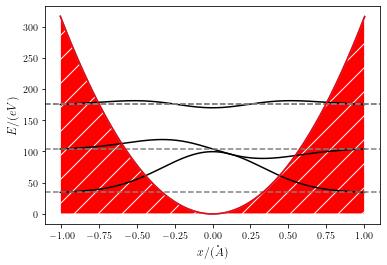

In [323]:
n = 3
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

steps, psi_n1, E1 = wf.plot_wavefunction(n = 1, V = partial(harmonic, k = 1e4), x_min = -L, x_max = L, dx = 1e-13 )

plt.plot(steps/1e-10, (psi_n1*5e-4)/math.sqrt(trapz(psi_n1**2, steps)) + E1/1.6e-19, c="black")
plt.axhline(E1/1.6e-19, linestyle="--", c="gray")

for n in range(2, n + 1):
    steps, psi, E = wf.plot_wavefunction(n = n, V = partial(harmonic, k = 1e4), x_min = -L, x_max = L, dx = 1e-13 )
    plt.plot(steps/1e-10, ((psi*5e-4)/math.sqrt(trapz(psi_n1**2, steps))) + E/1.6e-19, c="black")
    print(E/1.6e-19)

    plt.axhline(E/1.6e-19, linestyle="--", c="gray")


plt.axhline(E/1.6e-19, linestyle="--", c="gray")

plt.xlabel("$x /  ( \AA )$", fontsize=12)
plt.ylabel("$E /  ( eV )$", fontsize=12)

plt.plot(np.arange(-L, L, 1e-13)/1e-10, [harmonic(k = 1e4, x = x)/1.6e-19 for x in np.arange(-L, L, 1e-13)], c="red")
plt.fill_between(np.arange(-L, L, 1e-13)/1e-10, [harmonic(k = 1e4, x = x)/1.6e-19 for x in np.arange(-L, L, 1e-13)], facecolor="red", hatch="/", edgecolor="white")

In [23]:
def harmonic_well_wf(n, psi_n1 = None, sf = 1, potential = True, wavefunctions = True):
    if wavefunctions:
        steps, psi, E = wf.plot_wavefunction(n = n, V = partial(harmonic, k = 1e4), x_min = -L, x_max = L, dx = 1e-14 )
        plt.plot(steps/1e-10, ((psi*sf)/math.sqrt(trapz(psi_n1**2, steps))) + E/1.6e-19, c="black")
    
    else:
        E = wf.eigen_energy_solver(n = n, V = partial(harmonic, k = 1e4), x_min = -L, x_max = L, dx = 1e-13)
        
    plt.axhline(E/1.6e-19, linestyle="--", c="gray")
    plt.text(0.0,(E/1.6e-19) + 10 ,f"$E_{n} = {str(round(E/1.6e-19))} eV$", fontsize=12)
    
    plt.xlabel("$x /  ( \AA )$", fontsize=12)
    plt.ylabel("$E /  ( eV )$", fontsize=12)
    if potential:
        plt.plot(np.arange(-L, L, 1e-14)/1e-10, [harmonic(k = 1e4, x = x)/1.6e-19 for x in np.arange(-L, L, 1e-14)], c="red")
        plt.fill_between(np.arange(-L, L, 1e-14)/1e-10, [harmonic(k = 1e4, x = x)/1.6e-19 for x in np.arange(-L, L, 1e-14)], facecolor="red", hatch="/", edgecolor="white")
    

In [24]:
def harmonic_well_wfs(n, sf = 1, potential = True, wavefunctions = True):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": "Helvetica",
    })
    
    for i in range(1, n + 1):
        if i == 1:
            _, psi_n1, _ = wf.plot_wavefunction(n = 1, V = partial(harmonic, k = 1e4), x_min = -L, x_max = L, dx = 1e-14) # figure how to pass this back
        harmonic_well_wf(n = i, sf = sf, potential = True, psi_n1 = psi_n1, wavefunctions = wavefunctions)

In [80]:
def harmonic_energy_exact(n, k, m):
    return (n + 0.5)*h*(1/1.6e-19)*(1/(2*math.pi))*math.sqrt(k/m)

In [82]:
harmonic_energy_exact(n =1, k = 1e4, m = 9.11e-31)

103.64437761867677

In [97]:
import pandas as pd
pd.set_option("display.precision", 14)


def find_n_harmonic_eigenenergies(n, V, x_min = 0, x_max = L, dx = 1e-15, method="rk4", m = 9.11e-31, k = 1e4):
    
    levels = [n for n in range(1, n + 1)]
    numerical = []
    exact = []
    deltas = []
    
    for n in levels:
        e = wf.eigen_energy_solver(n = n , V = V, x_min = x_min, x_max = x_max, dx = dx, method=method)/1.6e-19
        numerical.append(e) 
        exact_val = harmonic_energy_exact(n = n - 1, k = 1e4, m = 9.11e-31)
        #exact.append(exact_val)
        print(exact_val)
        deltas.append(abs(e - exact_val))
    df = pd.DataFrame({'n' : levels, 'E_num': numerical,"Error" : deltas})
    return df

In [98]:
find_n_harmonic_eigenenergies(n = 2, V = partial(harmonic, k = 1e4), dx = 1e-14)

34.54812587289226
103.64437761867677


,n,E_num,Error
0,1,104.00256380459797,69.45443793170571
1,2,252.21744217904870,148.57306456037193


In [ ]:
harmonic_well_wfs(n = 4, sf = 5e-4, wavefunctions = False)
plt.savefig("hpw_-LL_energies")

### Square

In [429]:
def square_well_wf(n, psi_n1 = None, sf = 1, potential = True):
    V = partial(square, bound_1 = -0.5e-10, Vb1 = 4e-17, bound_2 = 0.5e-10, Vb2 = 4e-17, Vs = 0)
    steps, psi, E = wf.plot_wavefunction(n = n, V = V, x_min = -L, x_max = L, dx = 1e-13 )
    plt.plot(steps/1e-10, ((psi*sf)/math.sqrt(trapz(psi_n1**2, steps))) + E/1.6e-19, c="black")

    plt.axhline(E/1.6e-19, linestyle="--", c="gray")
    plt.text(0.0,(E/1.6e-19) + 10 ,f"$E_{n} = {str(round(E/1.6e-19))} eV$", fontsize=12)
    
    plt.xlabel("$x /  ( \AA )$", fontsize=12)
    plt.ylabel("$E /  ( eV )$", fontsize=12)
    if potential:
        plt.plot(np.arange(-L, L, 1e-13)/1e-10, [square(bound_1 = -0.5e-10, Vb1 = 4e-17, bound_2 = 0.5e-10, Vb2 = 4e-17, Vs = 0, x = x)/1.6e-19 for x in np.arange(-L, L, 1e-13)], c="red")
        plt.fill_between(np.arange(-L, L, 1e-13)/1e-10, [square(bound_1 = -0.5e-10, Vb1 = 4e-17, bound_2 = 0.5e-10, Vb2 = 4e-17, Vs = 0, x = x)/1.6e-19 for x in np.arange(-L, L, 1e-13)], facecolor="red", hatch="/", edgecolor="white")

In [430]:
def square_well_wfs(n, sf = 1, potential = True):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": "Helvetica",
    })
    
    for i in range(1, n + 1):
        if i == 1:
            _, psi_n1, _ = wf.plot_wavefunction(n = 1, V = partial(square, bound_1 = -0.5e-10, Vb1 = 4e-17, bound_2 = 0.5e-10, Vb2 = 4e-17, Vs = 0), x_min = -L, x_max = L, dx = 1e-13)
        square_well_wf(n = i, sf = sf, potential = True, psi_n1 = psi_n1)

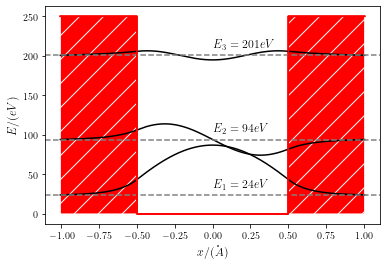

In [432]:
square_well_wfs(n = 3, sf = 5e-4)
plt.savefig("spw_-LL_visual")

### Morse

In [192]:
# V = partial(morse, D_e = 4.67*(1.6e-18), a = 1.85e-10, r_e = 1.2e-10)

def morse_well_wf(n, psi_n1 = None, sf = 1, potential = True, eigenfunctions = False):
    #V = partial(square, bound_1 = -0.5e-10, Vb1 = 4e-17, bound_2 = 0.5e-10, Vb2 = 4e-17, Vs = 0)
    V = partial(morse, D_e = 4.67*(1.6e-18), a = 1.85e-10, r_e = 2.4e-10)
    
    steps, psi, E = wf.plot_wavefunction(n = n, V = V, x_min = 0, x_max = 10*L, dx = 1e-13 )
    if eigenfunctions:
        plt.plot(steps/1e-10, ((psi*sf)/math.sqrt(trapz(psi_n1**2, steps))) + E/1.6e-19, c="black")

    plt.axhline(E/1.6e-19, linestyle="--", c="gray")
    if n == 3 or n == 5:
        pass
    else:
        plt.text(5.05,(E/1.6e-19) + 2 ,f"$E_{n} = {str(round(E/1.6e-19))} eV$", fontsize=12)
    
    plt.xlabel("$x /  ( \AA )$", fontsize=12)
    plt.ylabel("$E /  ( eV )$", fontsize=12)
    
    if potential:
        plt.plot(np.arange(0, 10*L, 1e-13)/1e-10, [morse(D_e = 4.67*(1.6e-18), a = 1.85e-10, r_e = 2.4e-10, x = x)/1.6e-19 for x in np.arange(0, 10*L, 1e-13)], c="red")
        plt.fill_between(np.arange(0, 10*L, 1e-13)/1e-10, [morse(D_e = 4.67*(1.6e-18), a = 1.85e-10, r_e = 2.4e-10, x = x)/1.6e-19 for x in np.arange(0, 10*L, 1e-13)], facecolor="red", hatch="/", edgecolor="white")

In [193]:
def morse_well_wfs(n, sf = 1, potential = True, eigenfunctions = False):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": "Helvetica",
    })
    
    for i in range(1, n + 1):
        if i == 1:
            _, psi_n1, _ = wf.plot_wavefunction(n = 1, V = partial(morse, D_e = 4.67*(1.6e-18), a = 1.85e-10, r_e = 2.4e-10), x_min = 0, x_max = 10*L, dx = 1e-13)
        morse_well_wf(n = i, sf = sf, potential = True, psi_n1 = psi_n1, eigenfunctions = eigenfunctions)

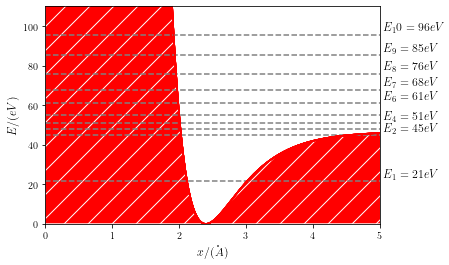

In [194]:
morse_well_wfs(n = 10, sf = 5e-2)
plt.xlim(0, 5)
plt.ylim(0, 110)
plt.savefig("morse_energies")

In [ ]:
morse_well_wfs(n = 1, sf = 5e-4, eigenfunctions = True)
plt.xlim(-10, 80)

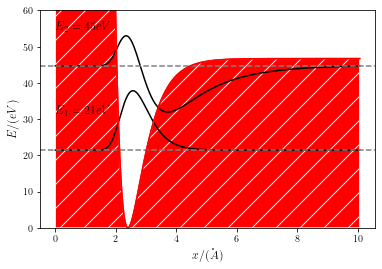

In [571]:
morse_well_wfs(n = 2, sf = 15e-5, eigenfunctions = True)
plt.ylim(0, 60)
plt.savefig("morse_visual")

(0.0, 100.0)

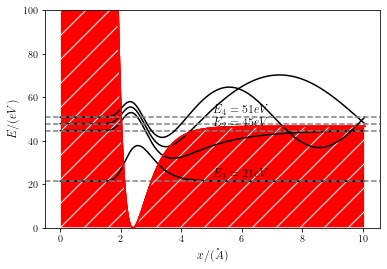

In [195]:
morse_well_wfs(n = 4, sf = 15e-5, eigenfunctions = True)
plt.ylim(0, 100)
#plt.savefig("morse_visual")

3.314817260173127e-17


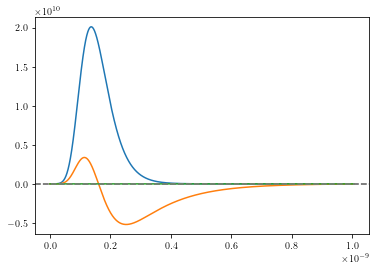

In [449]:
# Something is annoying me here, energy is calculated for specific potential and used in plot. 
# Psi will not change when boundaries are change. 
# Want it to look like atomic picture may to separate boundaries from plot boundaries.

print(wf.eigen_energy_solver(n = 1, V = partial(morse, D_e = 4.67*(1.6e-18), a = 1.85e-10, r_e = 1.2e-10), x_min = -L, x_max = L, dx = 1e-13))
steps, psi_n1, E = wf.plot_wavefunction(n = 1, V = partial(morse, D_e = 4.67*(1.6e-18), a = 1.85e-10, r_e = 1.2e-10), x_min = 0, x_max = 10*L, dx = 1e-13)
plt.plot(steps, (psi/(trapz(psi_n1**2, steps))*psi.max()) + E/1.6e-19)

steps, psi, E = wf.plot_wavefunction(n = 2, V = partial(morse, D_e = 4.67*(1.6e-18), a = 1.85e-10, r_e = 1.2e-10), x_min = 0, x_max = 10*L, dx = 1e-13)
plt.plot(steps, (psi/(trapz(psi_n1**2, steps))*psi.max()) + E/1.6e-19)

steps, psi, E = wf.plot_wavefunction(n = 3, V = partial(morse, D_e = 4.67*(1.6e-18), a = 1.85e-10, r_e = 1.2e-10), x_min = 0, x_max = 10*L, dx = 1e-13)


plt.plot(steps, (psi/(trapz(psi_n1**2, steps))*psi + E/1.6e-19)

## Barrier

### V > E

In [775]:
dx = 1e-13
steps = np.arange(-3*L, 3*L, dx)

levels = [i for i in range(1, 4)]
psis = []
energies = []

for n in levels:
    E = wf.eigen_energy_solver(n = n, V = ipw, x_min = -3*L, x_max = 3*L, dx = dx)
    w = np.zeros(len(steps))
    psi = np.zeros(len(steps))

    # inital conditions

    w[0] = 1 # are these true for all potentials
    psi[0] = 0

    for i, step in enumerate(steps[:-1]):
        w[i + 1] , psi[i + 1] =  wf.runge_kutta(w[i], psi[i], E, square(x = step, bound_1 = -0.5e-10, Vb1 = 0, bound_2 = 0.5e-10, Vb2 = 0, Vs = 1.5*E), dx)
    psis.append(psi)
    energies.append(E)

In [778]:
# create wavefunction in ipw, add the barrier, plot
dx = 1e-13
steps = np.arange(-3*L, 3*L, dx)

levels = [i for i in range(5, 9)]
psis = []
energies = []

for n in levels:
    
    E = wf.eigen_energy_solver(n = n, V = ipw, x_min = -3*L, x_max = 3*L, dx = dx)
    energies.append(E)
    

for E in energies:
    w = np.zeros(len(steps))
    psi = np.zeros(len(steps))

    # inital conditions

    w[0] = 1 # are these true for all potentials
    psi[0] = 0
    
    for i, step in enumerate(steps[:-1]):
        w[i + 1] , psi[i + 1] =  wf.runge_kutta(w[i], psi[i], E, square(x = step, bound_1 = -0.5e-10, Vb1 = 0, bound_2 = 0.5e-10, Vb2 = 0, Vs = 1.05*energies[-1]), dx)
    psis.append(psi)

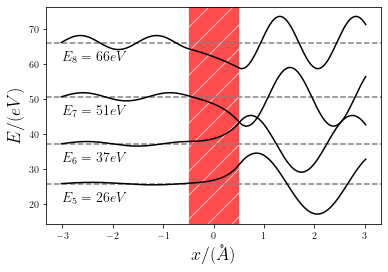

In [779]:
for i, psi in enumerate(psis):
    plt.axhline(energies[i]/1.6e-19, linestyle="--", c="gray")
    plt.text(-3,(energies[i]/1.6e-19) - 5 ,f"$E_{i + 5} = {str(round(energies[i]/1.6e-19))} eV$", fontsize=14)

    plt.plot(steps/1e-10, ((psi*10e-5)/math.sqrt(trapz(psis[i]**2, steps)) + energies[i]/1.6e-19), c="black")
plt.axvspan(xmin=-0.5, xmax=0.5, ymin=0, ymax=2, facecolor='red', alpha=0.7, hatch="/", edgecolor="white") # step up color

plt.xlabel("$x /  ( \AA )$", fontsize=18)
plt.ylabel(r"$E /  ( eV )$", fontsize=18)
plt.savefig("barrier_vgee_wave")

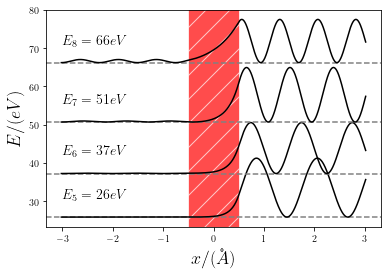

In [787]:
for i, psi in enumerate(psis):
    plt.axhline(energies[i]/1.6e-19, linestyle="--", c="gray")
    plt.text(-3,(energies[i]/1.6e-19) + 5 ,f"$E_{i + 5} = {str(round(energies[i]/1.6e-19))} eV$", fontsize=14)

    plt.plot(steps/1e-10, ((psi*4.5e-5)/math.sqrt(trapz(psis[i]**2, steps)))**2 + energies[i]/1.6e-19, c="black")
plt.axvspan(xmin=-0.5, xmax=0.5, ymin=0, ymax=2, facecolor='red', alpha=0.7, hatch="/", edgecolor="white") # step up color

plt.xlabel("$x /  ( \AA )$", fontsize=18)
plt.ylabel(r"$E /  ( eV )$", fontsize=18)


plt.savefig("barrier_vgee_prob")

### V < E

In [118]:
dx = 1e-13
steps = np.arange(-3*L, 3*L, dx)

levels = [i for i in range(5, 9)]
psis = []
energies = []

for n in levels:
    
    E = wf.eigen_energy_solver(n = n, V = ipw, x_min = -3*L, x_max = 3*L, dx = dx)
    energies.append(E)
    

for E in energies:
    w = np.zeros(len(steps))
    psi = np.zeros(len(steps))

    # inital conditions

    w[0] = 1 # are these true for all potentials
    psi[0] = 0
    
    for i, step in enumerate(steps[:-1]):
        w[i + 1] , psi[i + 1] =  wf.runge_kutta(w[i], psi[i], E, square(x = step, bound_1 = -0.5e-10, Vb1 = 0, bound_2 = 0.5e-10, Vb2 = 0, Vs = 0.95*energies[0]), dx)
    psis.append(psi)

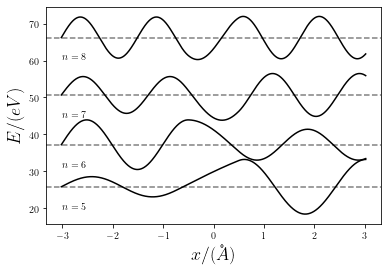

In [119]:
for i, psi in enumerate(psis):
    plt.axhline(energies[i]/1.6e-19, linestyle="--", c="gray")
    plt.text(-3,(energies[i]/1.6e-19) -6 ,f"$n  = {i + 5}$")

    plt.plot(steps/1e-10, ((psi*10e-5)/math.sqrt(trapz(psis[i]**2, steps)) + energies[i]/1.6e-19), c="black")
plt.axvspan(xmin=-0.5, xmax=0.5, ymin=0, ymax=0.5, facecolor='white', alpha=0.7, hatch="/", edgecolor="white") # step up color


plt.xlabel("$x /  ( \AA )$", fontsize=18)
plt.ylabel(r"$E /  ( eV )$", fontsize=18)
plt.savefig("barrier_vtee_wave")

In [ ]:
for i, psi in enumerate(psis):
    plt.axhline(energies[i]/1.6e-19, linestyle="--", c="gray")
    plt.text(-3,(energies[i]/1.6e-19) + 10 ,f"$E_{i + 5} = {str(round(energies[i]/1.6e-19))} eV$", fontsize=14)

    plt.plot(steps/1e-10, ((psi*4.5e-5)/math.sqrt(trapz(psis[i]**2, steps)))**2 + energies[i]/1.6e-19, c="black")
plt.axvspan(xmin=-0.5, xmax=0.5, ymin=0, ymax=2, facecolor='red', alpha=0.7, hatch="/", edgecolor="white") # step up color

plt.xlabel("$x /  ( \AA )$", fontsize=18)
plt.ylabel(r"$E /  ( eV )$", fontsize=18)
plt.savefig("barrier_vtee_prob")

#maybe some interesting comments here on the fact that the probability ampl is highest in barrier. Less KE, so slower and more likely to be found there.

#Also seems bizare amplitude is higher on lhs for even and higher on rhs for odd. Should be the same both sides.
#


## Steps

### Step Up, E > V

In [122]:
dx = 1e-14
steps = np.arange(-3*L, 3*L, dx)

levels = [i for i in range(10, 14)]
psis = []
energies = []

for n in levels:
    
    E = wf.eigen_energy_solver(n = n, V = ipw, x_min = -3*L, x_max = 3*L, dx = dx)
    energies.append(E)
    
print(energies)
for E in energies:
    w = np.zeros(len(steps))
    psi = np.zeros(len(steps))

    # inital conditions

    w[0] = 1 # are these true for all potentials
    psi[0] = 0
    
    for i, step in enumerate(steps[:-1]):
        w[i + 1] , psi[i + 1] =  wf.runge_kutta(w[i], psi[i], E, square(x = step, bound_1 = 0, Vb1 = 0, bound_2 = 3e-10, Vb2 = 100*(1.6e-19), Vs = 100*(1.6e-19)), dx)
    psis.append(psi)

[1.6544789527140414e-17, 2.0019195327838423e-17, 2.382449691909264e-17, 2.79606943008576e-17]


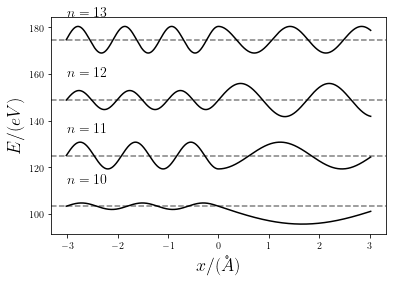

In [123]:
for i, psi in enumerate(psis):
    plt.axhline(energies[i]/1.6e-19, linestyle="--", c="gray")
    plt.text(-3,(energies[i]/1.6e-19) + 10 ,f"$n = {i + 10}$", fontsize=14)

    plt.plot(steps/1e-10, ((psi*10e-5)/math.sqrt(trapz(psis[i]**2, steps)) + energies[i]/1.6e-19), c="black")
#plt.axvspan(xmin=0, xmax=3, ymin=0, ymax=0.5, facecolor='red', alpha=0.7, hatch="/", edgecolor="white") # step up color



plt.xlabel("$x /  ( \AA )$", fontsize=18)
plt.ylabel(r"$E /  ( eV )$", fontsize=18)
plt.savefig("stepup_vtee_wave")

In [815]:
# create wavefunction in ipw, add the barrier, plot
dx = 1e-13
steps = np.arange(-3*L, 3*L, dx)

E = wf.eigen_energy_solver(n = 10, V = ipw, x_min = -3*L, x_max = 3*L, dx = dx)

print(E)

w = np.zeros(len(steps))
psi = np.zeros(len(steps))

# inital conditions

w[0] = 1
psi[0] = 0

for i, step in enumerate(steps[:-1]):
    w[i + 1] , psi[i + 1] =  wf.runge_kutta(w[i], psi[i], E, square(x = step, bound_1 = -0.5e-10, Vb1 = 0, bound_2 = 0.5e-10, Vb2 = 100*(1.6e-19), Vs = 1.05*(2.79606943008576e-17)), dx)

1.6549174721506142e-17


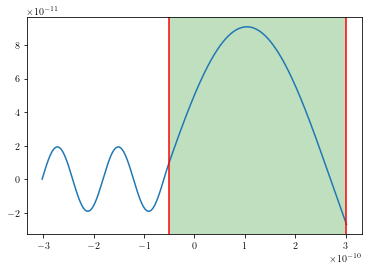

In [816]:
plt.plot(steps, psi)
plt.axvline(-0.5e-10, c="red")
plt.axvline(3e-10, c="red")
plt.axvspan(-0.5e-10, 3e-10, facecolor='green', alpha=0.25) # step up color

### Step up, E < V

[1.6544789527140414e-17, 2.0019195327838423e-17, 2.382449691909264e-17, 2.79606943008576e-17]


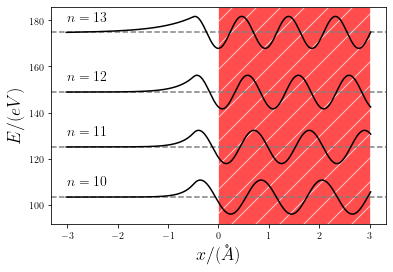

In [128]:
dx = 1e-14
steps = np.arange(-3*L, 3*L, dx)

levels = [i for i in range(10, 14)]
psis = []
energies = []

for n in levels:
    
    E = wf.eigen_energy_solver(n = n, V = ipw, x_min = -3*L, x_max = 3*L, dx = dx)
    energies.append(E)
    
print(energies)
for E in energies:
    w = np.zeros(len(steps))
    psi = np.zeros(len(steps))

    # inital conditions

    w[0] = 1 # are these true for all potentials
    psi[0] = 0
    
    for i, step in enumerate(steps[:-1]):
        #square(x = step, bound_1 = 0, Vb1 = 0, bound_2 = 3e-10, Vb2 = 1.05*energies[0], Vs = 1.05*energies[0])
        w[i + 1] , psi[i + 1] =  wf.runge_kutta(w[i], psi[i], E, square(x = step, bound_1 = -0.5e-10, Vb1 = 1.05*energies[-1], bound_2 = 0, Vb2 = 0, Vs = 0), dx)
    psis.append(psi)

for i, psi in enumerate(psis):
    plt.axhline(energies[i]/1.6e-19, linestyle="--", c="gray")
    plt.text(-3,(energies[i]/1.6e-19) + 5 ,f"$ n = {i + 10}$", fontsize=14)

    plt.plot(steps/1e-10, ((psi*10e-5)/math.sqrt(trapz(psis[i]**2, steps)) + energies[i]/1.6e-19), c="black")
plt.axvspan(xmin=0, xmax=3, ymin=0, ymax=1, facecolor='red', alpha=0.7, hatch="/", edgecolor="white") # step up color


plt.xlabel("$x /  ( \AA )$", fontsize=18)
plt.ylabel(r"$E /  ( eV )$", fontsize=18)
plt.savefig("stepup_vgte")

In [ ]:
dx = 1e-14
steps = np.arange(-3*L, 3*L, dx)

levels = [i for i in range(10, 14)]
psis = []
energies = []

for n in levels:
    
    E = wf.eigen_energy_solver(n = n, V = ipw, x_min = -3*L, x_max = 3*L, dx = dx)
    energies.append(E)
    
print(energies)
for E in energies:
    w = np.zeros(len(steps))
    psi = np.zeros(len(steps))

    # inital conditions

    w[0] = 1 # are these true for all potentials
    psi[0] = 0
    
    for i, step in enumerate(steps[:-1]):
        w[i + 1] , psi[i + 1] =  wf.runge_kutta(w[i], psi[i], E, square(x = step, bound_1 = -0.5e-10, Vb1 = 200*(1.6e-19), bound_2 = 0, Vb2 = 0, Vs = 0), dx)
    psis.append(psi)

In [31]:
dx = 1e-13
steps = np.arange(-3*L, 3*L, dx)

E = wf.eigen_energy_solver(n = 10, V = ipw, x_min = -3*L, x_max = 3*L, dx = dx)

print(E)

w = np.zeros(len(steps))
psi = np.zeros(len(steps))

# inital conditions

w[0] = 1 # are these true for all potentials
psi[0] = 0

for i, step in enumerate(steps[:-1]):
    w[i + 1] , psi[i + 1] =  wf.runge_kutta(w[i], psi[i], E, square(x = step, bound_1 = -0.5e-10, Vb1 = 200*(1.6e-19), bound_2 = 0, Vb2 = 0, Vs = 0), dx)

43
1.6549174721506142e-17


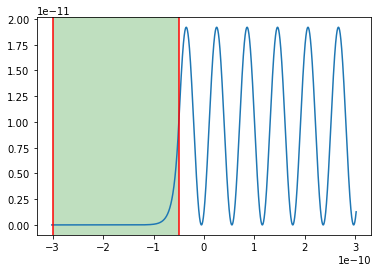

In [32]:
plt.plot(steps, psi**2)
plt.axvline(-0.5e-10, c="red")
plt.axvline(-3e-10, c="red")
plt.axvspan(-0.5e-10, -3e-10, facecolor='green', alpha=0.25) # step up color

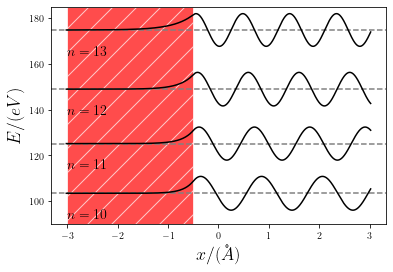

In [129]:
dx = 1e-14
steps = np.arange(-3*L, 3*L, dx)

levels = [i for i in range(10, 14)]
psis = []
energies = []

for n in levels:
    
    E = wf.eigen_energy_solver(n = n, V = ipw, x_min = -3*L, x_max = 3*L, dx = dx)
    energies.append(E)
    
for E in energies:
    w = np.zeros(len(steps))
    psi = np.zeros(len(steps))

    # inital conditions

    w[0] = 1 # are these true for all potentials
    psi[0] = 0
    
    for i, step in enumerate(steps[:-1]):
        w[i + 1] , psi[i + 1] =  wf.runge_kutta(w[i], psi[i], E, square(x = step, bound_1 = -0.5e-10, Vb1 = 200*(1.6e-19), bound_2 = 0, Vb2 = 0, Vs = 0), dx)
    psis.append(psi)

for i, psi in enumerate(psis):
    plt.axhline(energies[i]/1.6e-19, linestyle="--", c="gray")
    idx = i + 10
    plt.text(-3,(energies[i]/1.6e-19) - 11,f"$n = {idx}$", fontsize=14)

    plt.plot(steps/1e-10, ((psi*10e-5)/math.sqrt(trapz(psis[i]**2, steps)) + energies[i]/1.6e-19), c="black")
plt.axvspan(xmin=-3, xmax=-0.5, ymin=0, ymax=1, facecolor='red', alpha=0.7, hatch="/", edgecolor="white") # step up color

plt.ylim(90,185)
plt.xlabel("$x /  ( \AA )$", fontsize=18)
plt.ylabel(r"$E /  ( eV )$", fontsize=18)
plt.savefig("stepup_vgte")

### Step down

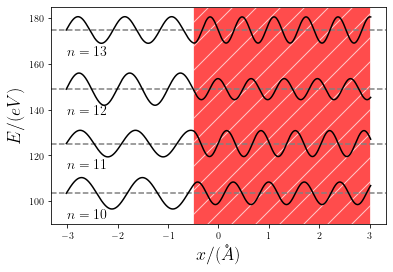

In [127]:
dx = 1e-14
steps = np.arange(-3*L, 3*L, dx)

levels = [i for i in range(10, 14)]
psis = []
energies = []

for n in levels:
    
    E = wf.eigen_energy_solver(n = n, V = ipw, x_min = -3*L, x_max = 3*L, dx = dx)
    energies.append(E)
    
for E in energies:
    w = np.zeros(len(steps))
    psi = np.zeros(len(steps))

    # inital conditions

    w[0] = 1 # are these true for all potentials
    psi[0] = 0
    
    for i, step in enumerate(steps[:-1]):
        w[i + 1] , psi[i + 1] =  wf.runge_kutta(w[i], psi[i], E, square(x = step, bound_1 = -0.5e-10, Vb1 = 0, bound_2 = 3e-10, Vb2 = -100*(1.6e-19), Vs = -200*(1.6e-19)), dx)
    psis.append(psi)

for i, psi in enumerate(psis):
    plt.axhline(energies[i]/1.6e-19, linestyle="--", c="gray")
    idx = i + 10
    plt.text(-3,(energies[i]/1.6e-19) - 11,f"$n = {idx}$", fontsize=14)

    plt.plot(steps/1e-10, ((psi*10e-5)/math.sqrt(trapz(psis[i]**2, steps)) + energies[i]/1.6e-19), c="black")
plt.axvspan(xmin=-0.5, xmax=3, ymin=0, ymax=1, facecolor='red', alpha=0.7, hatch="/", edgecolor="white") # step up color

plt.ylim(90,185)
plt.xlabel("$x /  ( \AA )$", fontsize=18)
plt.ylabel(r"$E /  ( eV )$", fontsize=18)
plt.savefig("stepdown_vtte")

In [33]:
dx = 1e-13
steps = np.arange(-3*L, 3*L, dx)

E = wf.eigen_energy_solver(n = 10, V = ipw, x_min = -3*L, x_max = 3*L, dx = dx)

print(E)

w = np.zeros(len(steps))
psi = np.zeros(len(steps))

# inital conditions

w[0] = 1 # are these true for all potentials
psi[0] = 0

for i, step in enumerate(steps[:-1]):
    w[i + 1] , psi[i + 1] =  wf.runge_kutta(w[i], psi[i], E, square(x = step, bound_1 = -0.5e-10, Vb1 = 0, bound_2 = 3e-10, Vb2 = -100*(1.6e-19), Vs = -200*(1.6e-19)), dx)

43
1.6549174721506142e-17


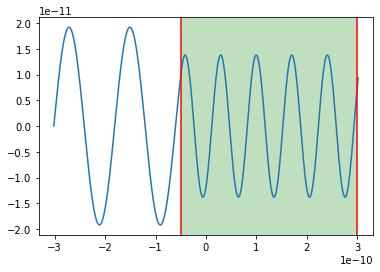

In [34]:
plt.plot(steps, psi)
plt.axvline(-0.5e-10, c="red")
plt.axvline(3e-10, c="red")
plt.axvspan(-0.5e-10, 3e-10, facecolor='green', alpha=0.25) # step up color